#### Sample gunshot

In [1]:
import IPython.display as ipd
ipd.Audio('UrbanSound8K/audio/fold1/7061-6-0-0.wav')

In [2]:
import librosa
data, sampling_rate = librosa.load('UrbanSound8K/audio/fold1/7061-6-0-0.wav')

print(data)
print(sampling_rate)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0231203e-05 2.3116412e-05
 0.0000000e+00]
22050


Populating the interactive namespace from numpy and matplotlib


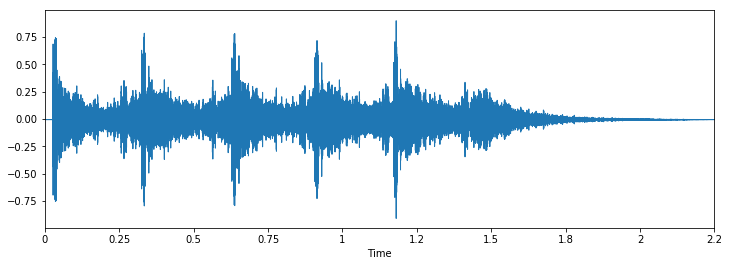

In [3]:
#see how a waveplot looks like
%pylab inline
import os
import pandas as pd
import glob 
import librosa.display

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

### Foreground noise

In [4]:
import pandas as pd
import numpy as np

train=pd.read_csv('Dataset100.csv')
train.head()

,slice_file_name,fsID,start,end,salience,fold,ClassID,Class,Is_GunShot
0,200460-6-2-0.wav,200460,4.987279,5.849278,1,10,6,gun_shot,1
1,200460-6-3-0.wav,200460,5.849278,7.096097,1,10,6,gun_shot,1
2,200460-6-4-0.wav,200460,7.096097,7.952965,1,10,6,gun_shot,1
3,174287-6-1-0.wav,174287,5.227853,7.463956,1,9,6,gun_shot,1
4,174287-6-2-0.wav,174287,9.869694,11.843632,1,9,6,gun_shot,1


Class:  children_playing
87


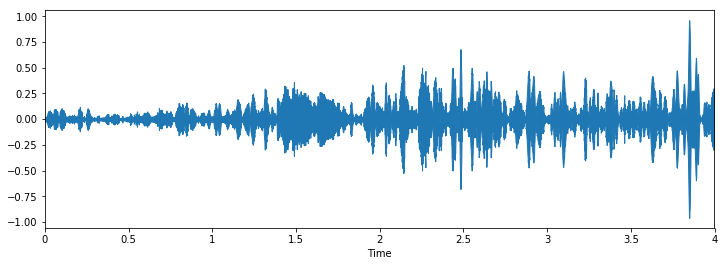

In [5]:
i = random.choice(train.index)

audio_name = train.slice_file_name[i]
path = os.path.join('UrbanSound8K/audio/fold' + str(train.fold[i]), train.slice_file_name[i])

print('Class: ', train.Class[i])
print(i)
x, sr = librosa.load(path)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [6]:
train.Class.value_counts()

gun_shot            50
children_playing    11
air_conditioner     10
drilling             8
engine_idling        7
jackhammer           6
street_music         5
dog_bark             3
Name: Class, dtype: int64

#### Using mfcc to transform features

###### This method parser() was taken from
https://www.analyticsvidhya.com/blog/2017/08/audio-voice-processing-deep-learning/

In [7]:
def parser(row):
   # function to load files and extract features
   file_name = os.path.join(os.path.abspath('UrbanSound8K/audio/fold' + str(row.fold)), row.slice_file_name)

   # handle exception to check if there isn't a file which is corrupted
   try:
      # here kaiser_fast is a technique used for faster extraction
      X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
      # we extract mfcc feature from data
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
   except Exception as e:
      print("Error encountered while parsing file: ", file)
      return None, None
 
   feature = mfccs
   label = row.Is_GunShot
 
   return [feature, label]

In [8]:
temp = train.apply(parser, axis=1)
temp.columns = ['feature', 'label']

In [9]:
columns = []
for i in range(len(temp[0][0])):
    columns.append("mfcc"+str(i+1))

In [10]:
df = pd.DataFrame(list(map(lambda x: x[0], temp)), columns=columns)
df['target'] = list(map(lambda x: x[1], temp))
df['file_name'] = train.slice_file_name
df

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,target,file_name
0,-313.009589,6.195528,-47.074182,31.004466,-3.478559,26.630661,2.557729,16.607439,5.584582,6.200118,...,2.124547,3.159626,1.678044,2.245491,1.832793,3.171346,2.744891,3.578924,1,200460-6-2-0.wav
1,-274.013900,9.200051,-45.149565,17.657600,-5.325993,19.651787,2.535653,17.422152,5.724641,7.105056,...,2.430716,4.623040,2.981494,2.746171,1.553561,2.760322,2.053617,3.098008,1,200460-6-3-0.wav
2,-302.589140,4.345874,-44.696578,24.273577,-1.029314,22.446089,2.853987,16.150843,5.233445,5.633969,...,2.047382,2.526276,2.671981,2.399450,2.223637,3.315966,3.657752,2.998497,1,200460-6-4-0.wav
3,-477.794483,87.180075,-39.688047,-8.796850,-8.523266,0.644867,-12.679641,-0.488313,-7.080444,1.414493,...,-2.991849,-2.647150,-2.809995,-2.737476,-2.540931,-2.293991,-2.817624,-2.989757,1,174287-6-1-0.wav
4,-466.211495,84.182667,-37.898204,-5.335292,-11.604817,-0.113773,-12.214779,-2.173400,-8.983038,1.735789,...,-3.082474,-2.966221,-2.801371,-2.714926,-2.801222,-1.087399,-1.398731,-1.841390,1,174287-6-2-0.wav
5,-467.349991,87.500069,-34.871908,-2.727101,-12.994252,-3.468107,-12.925622,-0.317378,-9.159942,0.527116,...,-2.258123,-2.411640,-2.447862,-2.122793,-2.389307,-2.133529,-1.614325,-1.715264,1,174287-6-3-0.wav
6,-253.935823,137.631906,-54.472653,9.999735,-29.402477,4.474683,-18.309372,2.099800,-11.633712,-1.528134,...,-1.956126,-1.024965,-3.822141,-1.877824,-0.712334,-1.033375,-1.429507,-1.360547,1,25038-6-0-0.wav
7,-260.085445,77.963394,-15.038172,8.118678,-5.634419,8.754218,-8.068297,5.492911,-7.408971,3.217534,...,2.963697,2.320532,1.571969,4.938679,4.491113,2.461502,2.017940,1.895499,1,162433-6-7-0.wav
8,-265.589191,77.999553,-14.059327,6.646988,-6.520324,8.891081,-7.471037,3.741365,-7.347434,4.278993,...,3.289254,2.265501,1.420575,4.861809,4.711314,3.536517,1.844691,1.988080,1,162433-6-8-0.wav
9,-258.596251,131.265163,-80.575945,-16.507941,-28.963178,-19.306005,-26.651563,-8.214196,-20.454482,-8.055365,...,-2.514124,-1.604007,-2.340794,-0.678679,-1.823301,-0.337898,-0.864335,-0.090882,1,174285-6-0-0.wav


In [11]:
# standardization using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df.iloc[:, :-2], dtype = float))

In [12]:
y = df.iloc[:,-2]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### All models used are referred from the textbook

In [13]:
#decision tree classifier
from sklearn import tree

clf = tree.DecisionTreeClassifier()
dt_clf=clf.fit(X_train,y_train)

y_pred_dtc = clf.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred_dtc)
print("Mean Squared Error on Test: ", mse)

Mean Squared Error on Test:  0.05


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_dtc)

0.95

In [15]:
#linear SVM
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [16]:
svm_clf=SVC(C=0.01)
svm_clf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred_svm=svm_clf.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred_svm)

0.4

In [19]:
#Ensemble - voting classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier()
svm_clf=SVC(C=0.1)
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [20]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred_vc=clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred_vc))

LogisticRegression 0.95
RandomForestClassifier 0.95
SVC 0.85
VotingClassifier 0.95


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: Fu

In [21]:
#Ensemble - Bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=10,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred_bag_clf=bag_clf.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred_bag_clf)

0.85

##### Creating confusion metrics, precision, recall and f1 score for all the models

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [25]:
#decision tree
print(confusion_matrix(y_test, y_pred_dtc))
print(precision_score(y_test, y_pred_dtc))
print(recall_score(y_test, y_pred_dtc))
print(f1_score(y_test, y_pred_dtc))

[[12  0]
 [ 1  7]]
1.0
0.875
0.9333333333333333


In [26]:
#SVM classifier
print(confusion_matrix(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_svm))
print(f1_score(y_test, y_pred_svm))

[[ 0 12]
 [ 0  8]]
0.4
1.0
0.5714285714285715


In [27]:
#voting classifier
print(confusion_matrix(y_test, y_pred_vc))
print(precision_score(y_test, y_pred_vc))
print(recall_score(y_test, y_pred_vc))
print(f1_score(y_test, y_pred_vc))

[[11  1]
 [ 0  8]]
0.8888888888888888
1.0
0.9411764705882353


In [28]:
#Bagging classifier
print(confusion_matrix(y_test, y_pred_bag_clf))
print(precision_score(y_test, y_pred_bag_clf))
print(recall_score(y_test, y_pred_bag_clf))
print(f1_score(y_test, y_pred_bag_clf))

[[10  2]
 [ 1  7]]
0.7777777777777778
0.875
0.823529411764706


#### Background noise

In [29]:
train_b=pd.read_csv('Dataset100Background.csv')
train_b.head(10)

,slice_file_name,fsID,start,end,salience,fold,ClassID,Class,Is_GunShot
0,135527-6-0-0.wav,135527,0.000000,1.280285,2,7,6,gun_shot,1
1,135527-6-1-0.wav,135527,1.280285,4.511481,2,7,6,gun_shot,1
2,135527-6-10-0.wav,135527,32.860655,33.714179,2,7,6,gun_shot,1
3,135527-6-11-0.wav,135527,36.274749,38.164694,2,7,6,gun_shot,1
4,135527-6-12-0.wav,135527,38.469524,40.420435,2,7,6,gun_shot,1
5,135527-6-13-0.wav,135527,43.468733,45.175780,2,7,6,gun_shot,1
6,135527-6-14-0.wav,135527,48.406976,52.406976,2,7,6,gun_shot,1
7,135527-6-14-1.wav,135527,48.906976,52.906976,2,7,6,gun_shot,1
8,135527-6-14-10.wav,135527,53.406976,57.406976,2,7,6,gun_shot,1
9,135527-6-14-2.wav,135527,49.406976,53.406976,2,7,6,gun_shot,1


In [30]:
train_b.Class.value_counts()

gun_shot            34
street_music        16
dog_bark            11
air_conditioner      8
siren                8
children_playing     7
drilling             7
engine_idling        6
car_horn             3
Name: Class, dtype: int64

Class:  dog_bark
62


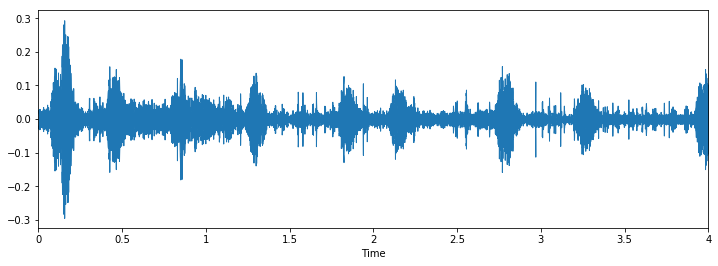

In [31]:
i_b = random.choice(train_b.index)

audio_name = train_b.slice_file_name[i_b]
path_b = os.path.join('UrbanSound8K/audio/fold' + str(train_b.fold[i_b]), train_b.slice_file_name[i_b])

print('Class: ', train_b.Class[i_b])
print(i_b)
x_b, sr_b = librosa.load(path_b)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x_b, sr=sr_b)

In [32]:
temp_b = train_b.apply(parser, axis=1)
temp_b.columns = ['feature', 'label']

In [33]:
df_b = pd.DataFrame(list(map(lambda x: x[0], temp_b)), columns=columns)
df_b['target'] = list(map(lambda x: x[1], temp_b))
df_b['file_name'] = train_b.slice_file_name
df_b

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,target,file_name
0,-81.088222,197.826697,-54.351739,19.097366,-28.348528,-0.530100,-18.578650,0.947382,-17.269849,-4.228706,...,-1.343574,-1.330350,-0.069597,0.134729,1.242489,0.933959,1.992379,0.267633,1,135527-6-0-0.wav
1,-27.386023,147.264072,-43.282808,17.202431,-22.706432,4.884874,-16.481322,4.703051,-14.546892,0.504751,...,-1.041128,0.652663,-0.462400,1.546939,0.925559,1.259354,0.233282,1.180580,1,135527-6-1-0.wav
2,-22.873054,146.274127,-32.746518,25.969182,-28.785868,5.571853,-19.379594,4.124980,-18.894236,1.770082,...,-1.400318,-0.213173,0.032825,2.354711,1.261829,1.052330,0.674446,-0.199954,1,135527-6-10-0.wav
3,-52.441798,179.801463,-42.503713,27.457323,-25.310282,1.533560,-16.858466,2.432444,-14.242563,-2.661708,...,-1.040574,0.393751,0.190123,1.660416,0.763781,-0.541481,-0.278035,-0.446089,1,135527-6-11-0.wav
4,-33.597598,170.372206,-56.713840,17.145204,-22.846880,8.282482,-17.419388,6.922746,-16.940437,1.391545,...,-1.478138,-0.720655,-0.140541,0.938059,-0.507387,-1.818594,-0.143042,0.113239,1,135527-6-12-0.wav
5,-25.878561,149.146167,-49.310143,17.293916,-21.288267,8.472847,-17.875457,4.265414,-16.707045,4.717148,...,-0.915688,-0.283907,-0.837069,0.397809,0.886684,-0.569525,0.530903,0.926017,1,135527-6-13-0.wav
6,-22.476007,135.203783,-44.485444,13.331458,-23.420484,4.798082,-17.447986,3.911555,-14.453249,2.164211,...,-1.513696,1.237880,-0.296814,1.842952,0.110646,0.551289,-0.412745,0.842272,1,135527-6-14-0.wav
7,-20.989078,136.509870,-43.656163,13.312191,-23.590363,4.293954,-17.122289,4.293300,-14.733985,1.289353,...,-1.233945,1.012251,-0.491495,1.737792,0.132561,0.710904,-0.355546,0.993955,1,135527-6-14-1.wav
8,-25.884398,137.906204,-41.196416,17.522668,-21.427758,4.991866,-15.839705,4.866815,-13.639821,0.680580,...,-1.415244,1.078056,0.660468,2.448772,-0.378380,0.695489,-0.426446,0.612064,1,135527-6-14-10.wav
9,-28.964689,141.963061,-44.222873,15.950274,-23.743121,3.700003,-16.994824,3.849535,-14.596305,0.724357,...,-1.313558,1.029188,0.322901,1.759995,0.518724,0.924641,-0.408629,0.581306,1,135527-6-14-2.wav


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_b = scaler.fit_transform(np.array(df_b.iloc[:, :-2], dtype = float))

In [35]:
y_b = df_b.iloc[:,-2]
from sklearn.model_selection import train_test_split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2)

In [36]:
#decision tree classifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2,max_leaf_nodes=2)
dt_clf_b=clf.fit(X_train_b,y_train_b)

y_pred_dtc_b = clf.predict(X_test_b)

from sklearn.metrics import mean_squared_error
mse_b = mean_squared_error(y_test_b,y_pred_dtc_b)
print("Mean Squared Error on Test: ", mse_b)

Mean Squared Error on Test:  0.0


In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_b,y_pred_dtc_b)

1.0

In [38]:
#SVM classifier
svm_clf=SVC(C=0.05)
svm_clf.fit(X_train_b,y_train_b)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred_svm_b=svm_clf.predict(X_test_b)

In [40]:
accuracy_score(y_test_b,y_pred_svm_b)

0.8

In [41]:
#Ensemble - voting classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier(max_depth=4)
svm_clf=SVC(C=0.01)
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train_b,y_train_b)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [42]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train_b,y_train_b)
    y_pred_vc_b=clf.predict(X_test_b)
    print(clf.__class__.__name__,accuracy_score(y_test_b,y_pred_vc_b))

LogisticRegression 1.0
RandomForestClassifier 1.0
SVC 0.8
VotingClassifier 1.0


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: Fu

In [43]:
#Ensemble - bagging classifier
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=10,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train_b,y_train_b)
y_pred_bag_clf_b=bag_clf.predict(X_test_b)

In [44]:
accuracy_score(y_test_b,y_pred_bag_clf_b)

1.0

In [45]:
#Decision tree classifier
print(confusion_matrix(y_test_b, y_pred_dtc_b))
print(precision_score(y_test_b, y_pred_dtc_b))
print(recall_score(y_test_b, y_pred_dtc_b))
print(f1_score(y_test_b, y_pred_dtc_b))

[[16  0]
 [ 0  4]]
1.0
1.0
1.0


In [46]:
#SVM classifier
print(confusion_matrix(y_test_b, y_pred_svm_b))
print(precision_score(y_test_b, y_pred_svm_b))
print(recall_score(y_test_b, y_pred_svm_b))
print(f1_score(y_test_b, y_pred_svm_b))

[[16  0]
 [ 4  0]]
0.0
0.0
0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
#Voting classifier
print(confusion_matrix(y_test_b, y_pred_vc_b))
print(precision_score(y_test_b, y_pred_vc_b))
print(recall_score(y_test_b, y_pred_vc_b))
print(f1_score(y_test_b, y_pred_vc_b))

[[16  0]
 [ 0  4]]
1.0
1.0
1.0


In [48]:
#Bagging classifier
print(confusion_matrix(y_test_b, y_pred_bag_clf_b))
print(precision_score(y_test_b, y_pred_bag_clf_b))
print(recall_score(y_test_b, y_pred_bag_clf_b))
print(f1_score(y_test_b, y_pred_bag_clf_b))

[[16  0]
 [ 0  4]]
1.0
1.0
1.0


### Fire cracker

In [49]:
train_fire_cracker=pd.read_csv('DatasetFirecracker.csv')
train_fire_cracker.head()

,slice_file_name,fsID,start,end,salience,fold,ClassID,Class,Is_GunShot
0,Firecracker1.wav,NaN,1.573952,4.673824,2,11,10,firecracker,0
1,Firecracker2.wav,NaN,1.976030,2.508892,2,11,10,firecracker,0
2,Firecracker3.wav,NaN,4.179637,4.568182,2,11,10,firecracker,0
3,Firecracker4.wav,NaN,2.429279,3.241121,2,11,10,firecracker,0
4,Firecracker5.wav,NaN,2.041889,6.041889,2,11,10,firecracker,0


In [50]:
train_fire_cracker.Class.value_counts()

gun_shot       70
firecracker    17
Name: Class, dtype: int64

In [51]:
def displayWaveplot(index):
    audio_name = train_fire_cracker.slice_file_name[index]
    path_fire_cracker = os.path.join('UrbanSound8K/audio/fold' + str(train_fire_cracker.fold[index]), train_fire_cracker.slice_file_name[index])

    print('Class: ', train_fire_cracker.Class[index])
    print(index)
    x_fire_cracker, sr_fire_cracker = librosa.load(path_fire_cracker)

    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(x_fire_cracker, sr=sr_fire_cracker)

In [52]:
i_fire_cracker = random.choice(train_fire_cracker.index)

Class:  gun_shot
19


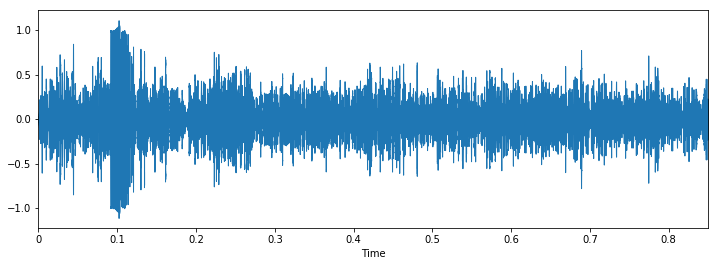

In [53]:
displayWaveplot(i_fire_cracker)

In [54]:
t = train_fire_cracker["Class"].tolist()

In [55]:
index_gunshot = t.index("gun_shot")

Class:  gun_shot
17


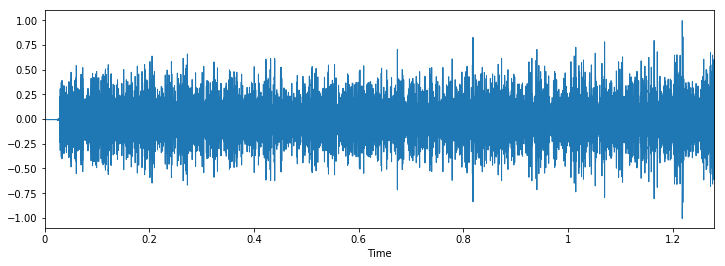

In [56]:
displayWaveplot(index_gunshot)

In [57]:
index_firecracker = t.index("firecracker")

Class:  firecracker
0


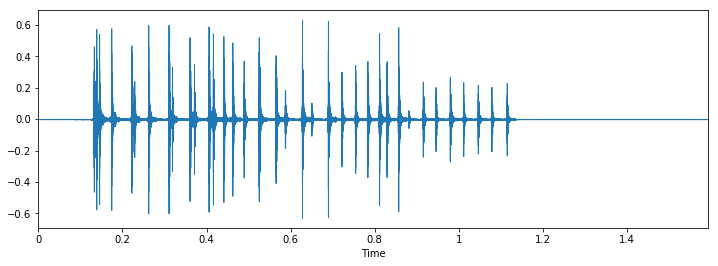

In [58]:
displayWaveplot(index_firecracker)

Class:  jackhammer
56


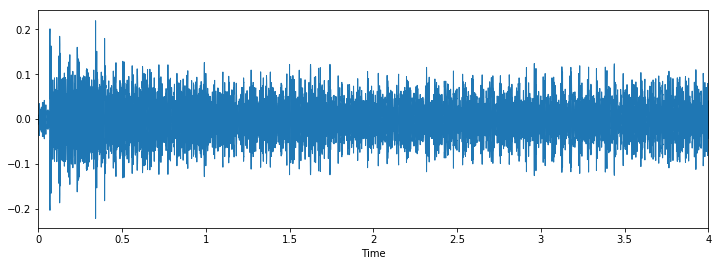

In [59]:
i = random.choice(train.index)
audio_name = train.slice_file_name[i]
path = os.path.join('UrbanSound8K/audio/fold' + str(train.fold[i]), train.slice_file_name[i])

print('Class: ', train.Class[i])
print(i)
x, sr = librosa.load(path)

plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)

In [60]:
temp_fire_cracker = train_fire_cracker.apply(parser, axis=1)
temp_fire_cracker.columns = ['feature', 'label']

In [61]:
df_fire_cracker = pd.DataFrame(list(map(lambda x: x[0], temp_fire_cracker)), columns=columns)
df_fire_cracker['target'] = list(map(lambda x: x[1], temp_fire_cracker))
df_fire_cracker['file_name'] = train_fire_cracker.slice_file_name
df_fire_cracker

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,target,file_name
0,-409.213351,-4.961202,-34.186661,2.092769,-13.334748,12.801373,-15.152257,13.924545,-23.754487,6.097287,...,0.606036,3.897692,-4.093976,0.224636,0.424138,0.000278,-4.039055,0.592684,0,Firecracker1.wav
1,-331.190613,69.396222,-13.998609,3.429764,-19.305138,5.344178,-12.389924,3.853887,-11.679742,2.870668,...,-2.720142,-2.407051,-3.406829,-2.245154,-1.317352,-2.942591,-2.178580,-1.687528,0,Firecracker2.wav
2,-499.984526,41.114399,-105.270458,-18.275810,0.809409,-2.540450,-11.461159,-8.138441,-10.027718,-5.058504,...,3.197844,1.182431,-0.213828,1.531218,0.416600,1.310500,3.434105,2.801681,0,Firecracker3.wav
3,-273.486912,119.237378,-138.366079,52.681435,-50.375648,-10.331322,5.730465,-35.961313,20.862278,-18.696799,...,-3.169643,4.739131,-2.103050,1.275834,2.665871,-1.553520,3.315029,-1.552834,0,Firecracker4.wav
4,-579.195821,37.116751,-12.402793,28.683998,7.702512,17.152144,2.276203,10.092275,-1.735086,8.143355,...,-0.860428,-0.494136,-1.294789,0.145114,-0.486590,-0.843355,-1.355607,-1.020273,0,Firecracker5.wav
5,-486.405882,50.002241,5.205899,44.346017,-4.437689,19.134836,-9.157026,16.765264,-12.397928,13.134280,...,-1.327569,-0.116648,-3.333882,-0.683275,-2.187149,-1.168710,-2.908666,-2.104236,0,Firecracker6.wav
6,-504.592759,31.577214,-28.797325,23.044939,0.912460,12.261985,-1.945260,13.628601,-2.874530,9.730316,...,-0.135797,0.472068,-0.088810,0.714488,-0.964401,0.177954,-0.821995,-0.308240,0,Firecracker7.wav
7,-399.092014,16.870477,-39.084321,12.313073,-18.205431,9.632364,-20.364132,-2.710573,-19.211467,0.650448,...,-2.569220,-0.350119,-1.392870,-0.535863,-2.113486,0.384735,-0.150710,0.077086,0,Firecracker8.wav
8,-593.713263,54.372336,-3.945857,1.787477,-3.567098,4.804087,2.994760,8.474814,1.770521,5.189303,...,-0.603051,-0.555611,-0.812090,-0.735196,-0.649598,-0.286998,-0.898118,-1.077282,0,Firecracker9.wav
9,-530.166163,69.087167,-6.137368,-10.895227,-8.829523,6.624774,5.669072,8.134355,3.468130,7.553933,...,-1.449555,-1.321692,-1.343368,-1.257394,-0.961788,-0.705509,-1.209455,-1.514065,0,Firecracker10.wav


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_fire_cracker = scaler.fit_transform(np.array(df_fire_cracker.iloc[:, :-2], dtype = float))

In [63]:
y_fire_cracker = df_fire_cracker.iloc[:,-2]
from sklearn.model_selection import train_test_split
X_train_fire_cracker, X_test_fire_cracker, y_train_fire_cracker, y_test_fire_cracker = train_test_split(X_fire_cracker, y_fire_cracker, test_size=0.2)

In [64]:
#decision tree classifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2,max_leaf_nodes=2)
dt_clf_fire_cracker=clf.fit(X_train_fire_cracker,y_train_fire_cracker)

y_pred_dtc_fire_cracker = clf.predict(X_test_fire_cracker)

from sklearn.metrics import mean_squared_error
mse_fire_cracker = mean_squared_error(y_test_fire_cracker,y_pred_dtc_fire_cracker)
print("Mean Squared Error on Test: ", mse_fire_cracker)

Mean Squared Error on Test:  0.0


In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_fire_cracker,y_pred_dtc_fire_cracker)

1.0

In [66]:
#SVM classifier
svm_clf=SVC(C=0.05)
svm_clf.fit(X_train_fire_cracker,y_train_fire_cracker)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [67]:
y_pred_svm_fire_cracker=svm_clf.predict(X_test_fire_cracker)

In [68]:
accuracy_score(y_test_fire_cracker,y_pred_svm_fire_cracker)

0.7222222222222222

In [69]:
#Ensemble - voting classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier(max_depth=4)
svm_clf=SVC(C=0.01)
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train_fire_cracker,y_train_fire_cracker)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [70]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train_fire_cracker,y_train_fire_cracker)
    y_pred_vc_fire_cracker=clf.predict(X_test_fire_cracker)
    print(clf.__class__.__name__,accuracy_score(y_test_fire_cracker,y_pred_vc_fire_cracker))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 1.0
RandomForestClassifier 0.8888888888888888
SVC 0.7222222222222222
VotingClassifier 1.0


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [71]:
#Ensemble - Bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [72]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=10,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train_fire_cracker,y_train_fire_cracker)
y_pred_bag_clf_fire_cracker=bag_clf.predict(X_test_fire_cracker)

In [73]:
accuracy_score(y_test_fire_cracker,y_pred_bag_clf_fire_cracker)

0.8888888888888888

In [74]:
#Decision tree
print(confusion_matrix(y_test_fire_cracker, y_pred_dtc_fire_cracker))
print(precision_score(y_test_fire_cracker, y_pred_dtc_fire_cracker))
print(recall_score(y_test_fire_cracker, y_pred_dtc_fire_cracker))
print(f1_score(y_test_fire_cracker, y_pred_dtc_fire_cracker))

[[ 5  0]
 [ 0 13]]
1.0
1.0
1.0


In [75]:
#SVM classifier
print(confusion_matrix(y_test_fire_cracker, y_pred_svm_fire_cracker))
print(precision_score(y_test_fire_cracker, y_pred_svm_fire_cracker))
print(recall_score(y_test_fire_cracker, y_pred_svm_fire_cracker))
print(f1_score(y_test_fire_cracker, y_pred_svm_fire_cracker))

[[ 0  5]
 [ 0 13]]
0.7222222222222222
1.0
0.8387096774193548


In [76]:
#Voting clasifier
print(confusion_matrix(y_test_fire_cracker, y_pred_vc_fire_cracker))
print(precision_score(y_test_fire_cracker, y_pred_vc_fire_cracker))
print(recall_score(y_test_fire_cracker, y_pred_vc_fire_cracker))
print(f1_score(y_test_fire_cracker, y_pred_vc_fire_cracker))

[[ 5  0]
 [ 0 13]]
1.0
1.0
1.0


In [77]:
#Bagging classifier
print(confusion_matrix(y_test_fire_cracker, y_pred_bag_clf_fire_cracker))
print(precision_score(y_test_fire_cracker, y_pred_bag_clf_fire_cracker))
print(recall_score(y_test_fire_cracker, y_pred_bag_clf_fire_cracker))
print(f1_score(y_test_fire_cracker, y_pred_bag_clf_fire_cracker))

[[ 3  2]
 [ 0 13]]
0.8666666666666667
1.0
0.9285714285714286


#### Background fire cracker

In [78]:
train_b_firecracker=pd.read_csv('Dataset100BackgroundWFirecracker.csv')
train_b_firecracker.head(10)

,slice_file_name,fsID,start,end,salience,fold,ClassID,Class,Is_GunShot
0,135527-6-0-0.wav,135527.0,0.000000,1.280285,2,7,6,gun_shot,1
1,135527-6-1-0.wav,135527.0,1.280285,4.511481,2,7,6,gun_shot,1
2,135527-6-10-0.wav,135527.0,32.860655,33.714179,2,7,6,gun_shot,1
3,135527-6-11-0.wav,135527.0,36.274749,38.164694,2,7,6,gun_shot,1
4,135527-6-12-0.wav,135527.0,38.469524,40.420435,2,7,6,gun_shot,1
5,135527-6-13-0.wav,135527.0,43.468733,45.175780,2,7,6,gun_shot,1
6,135527-6-14-0.wav,135527.0,48.406976,52.406976,2,7,6,gun_shot,1
7,135527-6-14-1.wav,135527.0,48.906976,52.906976,2,7,6,gun_shot,1
8,135527-6-14-10.wav,135527.0,53.406976,57.406976,2,7,6,gun_shot,1
9,135527-6-14-2.wav,135527.0,49.406976,53.406976,2,7,6,gun_shot,1


In [79]:
train_b_firecracker.Class.value_counts()

gun_shot            34
firecracker         17
street_music        16
dog_bark            11
air_conditioner      8
siren                8
children_playing     7
drilling             7
engine_idling        6
car_horn             3
Name: Class, dtype: int64

In [80]:
i_b_firecracker = random.choice(train_b_firecracker.index)

In [81]:
def displayWaveplotB(index):
    audio_name = train_b_firecracker.slice_file_name[index]
    path_b_firecracker = os.path.join('UrbanSound8K/audio/fold' + str(train_b_firecracker.fold[index]), train_b_firecracker.slice_file_name[index])

    print('Class: ', train_b_firecracker.Class[index])
    print(index)
    x_b_firecracker, sr_b_firecracker = librosa.load(path_b_firecracker)

    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(x_b_firecracker, sr=sr_b_firecracker)

Class:  car_horn
34


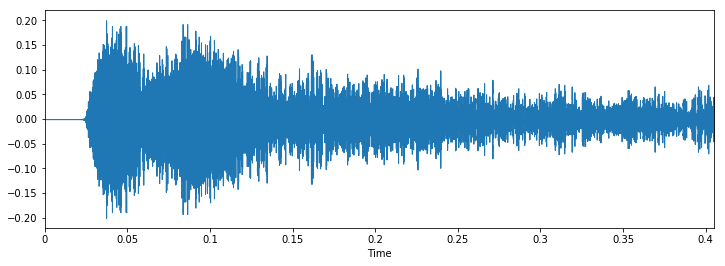

In [82]:
displayWaveplotB(i_b_firecracker)

In [83]:
t_b = train_b_firecracker["Class"].tolist()

In [84]:
index_gunshot_b = t_b.index("gun_shot")

In [85]:
index_firecracker_b = t_b.index("firecracker")

Class:  gun_shot
0


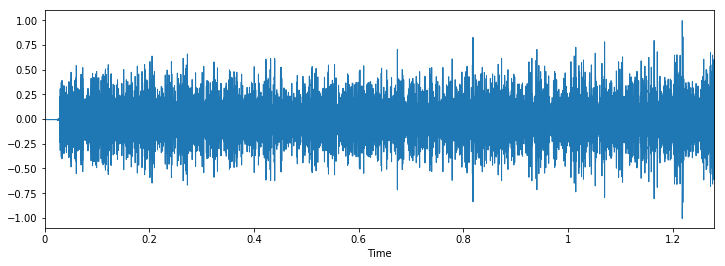

In [86]:
displayWaveplotB(index_gunshot_b)

Class:  firecracker
100


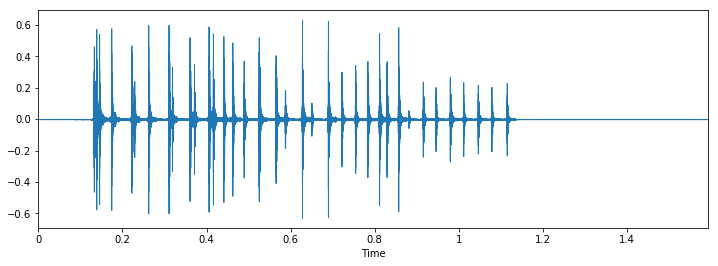

In [87]:
displayWaveplotB(index_firecracker_b)

In [88]:
temp_b_firecracker = train_b_firecracker.apply(parser, axis=1)
temp_b_firecracker.columns = ['feature', 'label']

In [89]:
df_b_firecracker = pd.DataFrame(list(map(lambda x: x[0], temp_b_firecracker)), columns=columns)
df_b_firecracker['target'] = list(map(lambda x: x[1], temp_b_firecracker))
df_b_firecracker['file_name'] = train_b_firecracker.slice_file_name
df_b_firecracker

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,target,file_name
0,-81.088222,197.826697,-54.351739,19.097366,-28.348528,-0.530100,-18.578650,0.947382,-17.269849,-4.228706,...,-1.343574,-1.330350,-0.069597,0.134729,1.242489,0.933959,1.992379,0.267633,1,135527-6-0-0.wav
1,-27.386023,147.264072,-43.282808,17.202431,-22.706432,4.884874,-16.481322,4.703051,-14.546892,0.504751,...,-1.041128,0.652663,-0.462400,1.546939,0.925559,1.259354,0.233282,1.180580,1,135527-6-1-0.wav
2,-22.873054,146.274127,-32.746518,25.969182,-28.785868,5.571853,-19.379594,4.124980,-18.894236,1.770082,...,-1.400318,-0.213173,0.032825,2.354711,1.261829,1.052330,0.674446,-0.199954,1,135527-6-10-0.wav
3,-52.441798,179.801463,-42.503713,27.457323,-25.310282,1.533560,-16.858466,2.432444,-14.242563,-2.661708,...,-1.040574,0.393751,0.190123,1.660416,0.763781,-0.541481,-0.278035,-0.446089,1,135527-6-11-0.wav
4,-33.597598,170.372206,-56.713840,17.145204,-22.846880,8.282482,-17.419388,6.922746,-16.940437,1.391545,...,-1.478138,-0.720655,-0.140541,0.938059,-0.507387,-1.818594,-0.143042,0.113239,1,135527-6-12-0.wav
5,-25.878561,149.146167,-49.310143,17.293916,-21.288267,8.472847,-17.875457,4.265414,-16.707045,4.717148,...,-0.915688,-0.283907,-0.837069,0.397809,0.886684,-0.569525,0.530903,0.926017,1,135527-6-13-0.wav
6,-22.476007,135.203783,-44.485444,13.331458,-23.420484,4.798082,-17.447986,3.911555,-14.453249,2.164211,...,-1.513696,1.237880,-0.296814,1.842952,0.110646,0.551289,-0.412745,0.842272,1,135527-6-14-0.wav
7,-20.989078,136.509870,-43.656163,13.312191,-23.590363,4.293954,-17.122289,4.293300,-14.733985,1.289353,...,-1.233945,1.012251,-0.491495,1.737792,0.132561,0.710904,-0.355546,0.993955,1,135527-6-14-1.wav
8,-25.884398,137.906204,-41.196416,17.522668,-21.427758,4.991866,-15.839705,4.866815,-13.639821,0.680580,...,-1.415244,1.078056,0.660468,2.448772,-0.378380,0.695489,-0.426446,0.612064,1,135527-6-14-10.wav
9,-28.964689,141.963061,-44.222873,15.950274,-23.743121,3.700003,-16.994824,3.849535,-14.596305,0.724357,...,-1.313558,1.029188,0.322901,1.759995,0.518724,0.924641,-0.408629,0.581306,1,135527-6-14-2.wav


In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_b_firecracker = scaler.fit_transform(np.array(df_b_firecracker.iloc[:, :-2], dtype = float))

In [91]:
y_b_firecracker = df_b_firecracker.iloc[:,-2]
from sklearn.model_selection import train_test_split
X_train_b_firecracker, X_test_b_firecracker, y_train_b_firecracker, y_test_b_firecracker = train_test_split(X_b_firecracker, y_b_firecracker, test_size=0.2)

In [92]:
#decision tree classifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=2,max_leaf_nodes=2)
dt_clf_b_firecracker=clf.fit(X_train_b_firecracker,y_train_b_firecracker)

y_pred_dtc_b_firecracker = clf.predict(X_test_b_firecracker)

from sklearn.metrics import mean_squared_error
mse_b_firecracker = mean_squared_error(y_test_b_firecracker,y_pred_dtc_b_firecracker)
print("Mean Squared Error on Test: ", mse_b_firecracker)

Mean Squared Error on Test:  0.08333333333333333


In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_b_firecracker,y_pred_dtc_b_firecracker)

0.9166666666666666

In [94]:
#SVM classifier
svm_clf=SVC(C=0.05)
svm_clf.fit(X_train_b_firecracker,y_train_b_firecracker)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [95]:
y_pred_svm_b_firecracker=svm_clf.predict(X_test_b_firecracker)

In [96]:
accuracy_score(y_test_b_firecracker,y_pred_svm_b_firecracker)

0.6666666666666666

In [97]:
#Ensemble - voting classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf=LogisticRegression()
rnd_clf=RandomForestClassifier(max_depth=4)
svm_clf=SVC(C=0.01)
voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')
voting_clf.fit(X_train_b_firecracker,y_train_b_firecracker)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [98]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train_b_firecracker,y_train_b_firecracker)
    y_pred_vc_b_firecracker=clf.predict(X_test_b_firecracker)
    print(clf.__class__.__name__,accuracy_score(y_test_b_firecracker,y_pred_vc_b_firecracker))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 1.0
RandomForestClassifier 0.9583333333333334
SVC 0.6666666666666666
VotingClassifier 1.0


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [99]:
#Bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [100]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=10,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train_b_firecracker,y_train_b_firecracker)
y_pred_bag_clf_b_firecracker=bag_clf.predict(X_test_b_firecracker)

In [101]:
accuracy_score(y_test_b_firecracker,y_pred_bag_clf_b_firecracker)

1.0

In [102]:
#Decision tree
print(confusion_matrix(y_test_b_firecracker, y_pred_dtc_b_firecracker))
print(precision_score(y_test_b_firecracker, y_pred_dtc_b_firecracker))
print(recall_score(y_test_b_firecracker, y_pred_dtc_b_firecracker))
print(f1_score(y_test_b_firecracker, y_pred_dtc_b_firecracker))

[[14  2]
 [ 0  8]]
0.8
1.0
0.888888888888889


In [103]:
#SVM classifier
print(confusion_matrix(y_test_b_firecracker, y_pred_svm_b_firecracker))
print(precision_score(y_test_b_firecracker, y_pred_svm_b_firecracker))
print(recall_score(y_test_b_firecracker, y_pred_svm_b_firecracker))
print(f1_score(y_test_b_firecracker, y_pred_svm_b_firecracker))

[[16  0]
 [ 8  0]]
0.0
0.0
0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
#Voting classifier
print(confusion_matrix(y_test_b_firecracker, y_pred_vc_b_firecracker))
print(precision_score(y_test_b_firecracker, y_pred_vc_b_firecracker))
print(recall_score(y_test_b_firecracker, y_pred_vc_b_firecracker))
print(f1_score(y_test_b_firecracker, y_pred_vc_b_firecracker))

[[16  0]
 [ 0  8]]
1.0
1.0
1.0


In [105]:
#Bagging classifier
print(confusion_matrix(y_test_b_firecracker, y_pred_bag_clf_b_firecracker))
print(precision_score(y_test_b_firecracker, y_pred_bag_clf_b_firecracker))
print(recall_score(y_test_b_firecracker, y_pred_bag_clf_b_firecracker))
print(f1_score(y_test_b_firecracker, y_pred_bag_clf_b_firecracker))

[[16  0]
 [ 0  8]]
1.0
1.0
1.0
